O objetivo deste *notebook* é apresentar alguns exemplos da psicofísica, com base no capítulo 2 de Nunnally e Bernstein (1994), *Traditional Approaches to Scaling*.

**Referência**

Nunnally, J. C., & Bernstein, I. H. (1994). *Psychometric theory* (3rd ed.). McGraw-Hill Inc. 

In [178]:
# importando bibliotecas
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

Uma das três perguntas básicas da psicofísica clássica envolve questões sobre limiares absolutos: Qual é a quantidade mínima de energia necessária para que um evento particular seja percebido sob condições particulares?

Em geral, *limiar* é definido do ponto de vista estatístico como o estímulo que é percebido em 50% das tentativas. A simulação a seguir tenta demonstrar a estimativa de um limiar, supondo, hipoteticamente, que saibamos qual é o limiar a priori.

In [179]:
# Baseado em Nunnally e Bernstein (1994), Capítulo 2

 # limiar absoluto
absolute_threshold = 200

# estímulos variam de intensidades entre 185 a 220, em incrementos de 5 em 5
stimuli = np.array(list(range(185, 220, 5)))

# número de tentativas por intensidade de estímulo
trials = 1_000

# lista armazenará as respostas do participante hipotético
responses = list()

# para cada intensidade de estímulos
for stimulus in stimuli:
    
    # quantas vezes o participante respondeu que viu um estímulo de uma dada intensidade?
    yes = 0
    
    # percorre as 1.000 tentativas
    for trial in range(trials):
        
        # psicofísica assume que efeito sensorial do estímulo também é afetado por ruído
        sensory_noise = np.random.normal(0, 10)
        
        # efeito sensorial será um somatório da magnitude do estímulo mais o ruído sensorial
        sensory_effect = stimulus + sensory_noise
        
        # se o efeito sensorial for igual ou maior que o limiar absoluto, participante responde "sim"
        if sensory_effect >= absolute_threshold:
            yes += 1
    
    # calcula a proporção de respostas "sim" para uma dada intensidade de estímulo
    responses.append(yes / trials)            

C:\Users\User\AppData\Local\Temp/ipykernel_6900/1760770181.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  par0 = scipy.array([175., 5.])


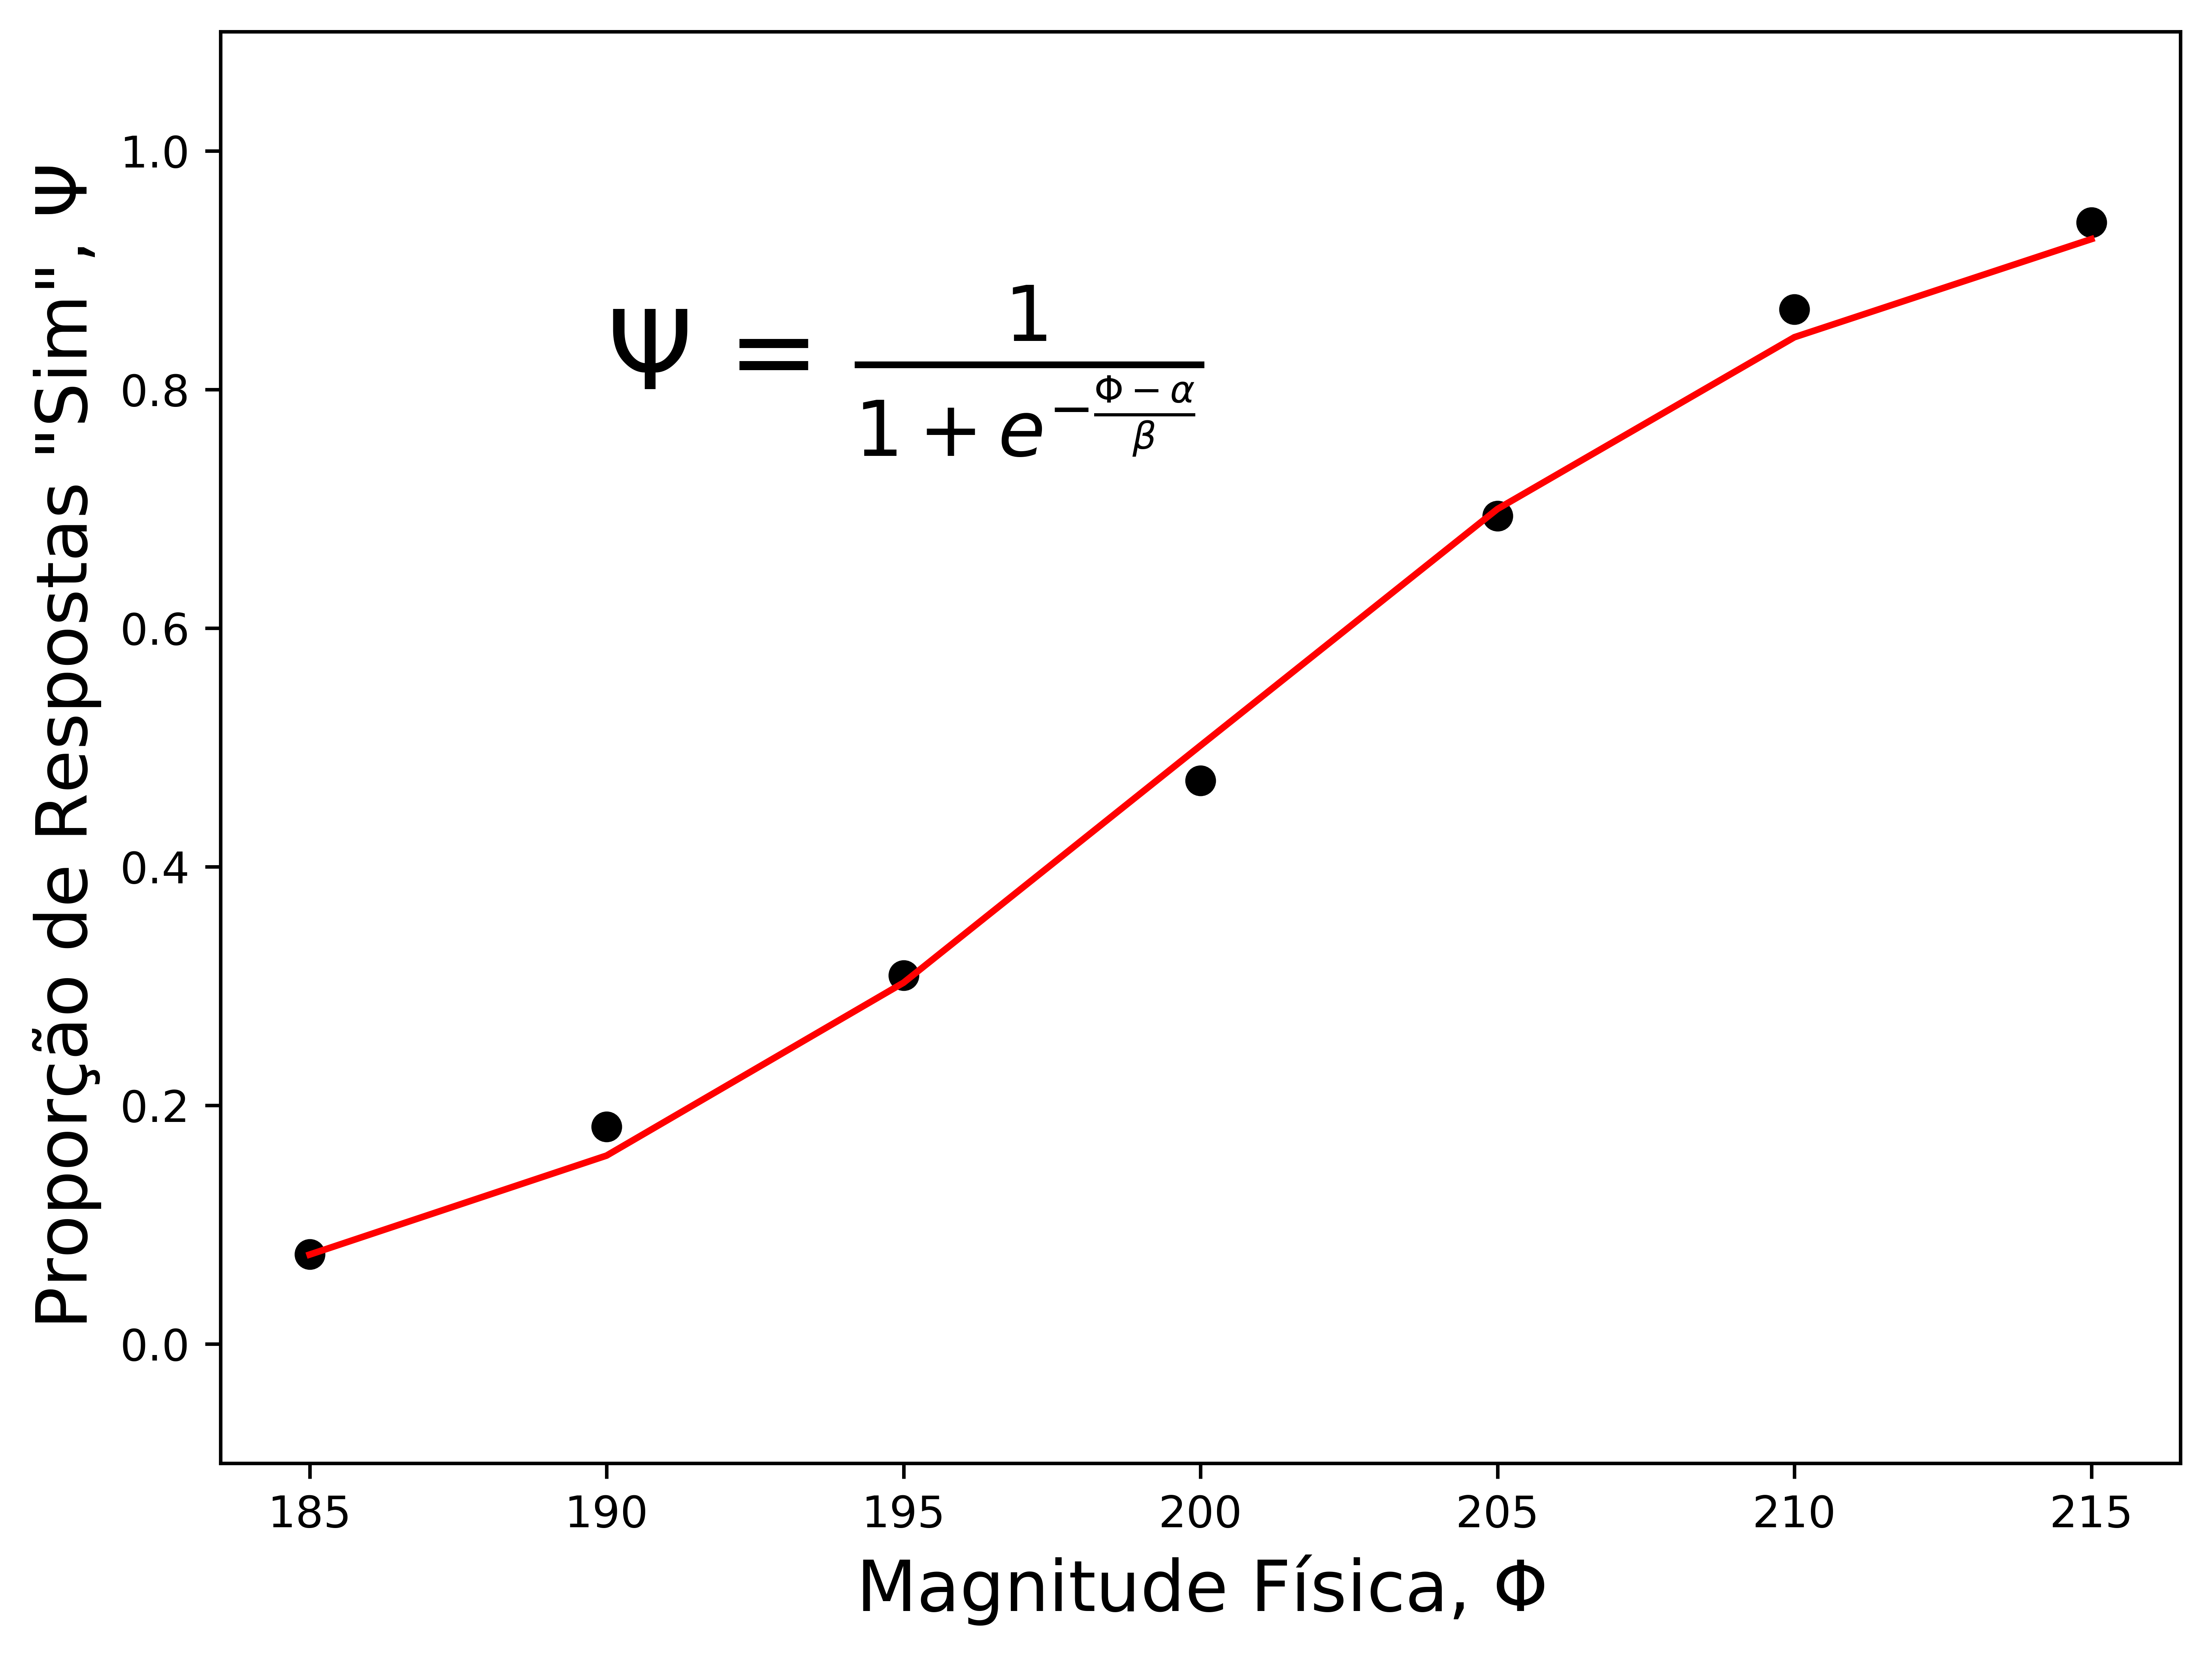

In [181]:
np.random.seed(42)

# função psicométrica (logística, no caso a seguir)
def psychometric_function(x, alpha, beta):
    return 1. / (1 + np.exp( -(x - alpha) / beta))

# valores iniciais das estimativas dos parâmetros
par0 = scipy.array([175., 5.]) 

# ajustando um modelo aos dados
par, mcov = curve_fit(psychometric_function, stimuli, responses, par0)


plt.figure(figsize = (8, 6), dpi = 800)

plt.rcParams["mathtext.default"] = "it"

plt.scatter(stimuli, responses, color = "black")
plt.plot(stimuli, psychometric_function(stimuli, par[0], par[1]), color = "red")
plt.xlabel("Magnitude Física, " + r"${\Phi}$", fontsize = 16)
plt.ylabel("Proporção de Respostas \"Sim\", " + r"${\Psi}$", fontsize = 16)
plt.ylim(-0.1, 1.1)

plt.annotate(text = r"${\Psi}$ = $\frac{1}{1 + e^{-\frac{\Phi - \alpha}{\beta}}}}$", 
            xy = (190, 0.8), fontsize = 25)


plt.savefig("015.1 - Limiar absoluto, função psicométrica.jpg", dpi = 600, bbox_inches = "tight")

plt.show()

In [182]:
print(responses)

[0.075, 0.182, 0.309, 0.472, 0.694, 0.867, 0.94]


A seguir, implemento alguns gráficos mostrando a relação entre intensidade do estímulo e magnitude da sensação psicológica correspondente, que é descrita por meio da lei de Fechner. Essa lei se foca em comparações **indiretas** e em nível de medida **ordinal**. Ela estima qual é a quantidade de aumento na intensidade de estímulo necessária para gerar a mudança em uma unidade psicológica na sensação desse estímulo. Essa relação é logarítmica, indicando que são necessários cada vez incrementos maiores na intensidade do estímulo para gerar mudanças correspondentes na sensação psicológica. Para detalhes, ver Nunnally e Berstein (1994) ou qualquer manual de Percepção.

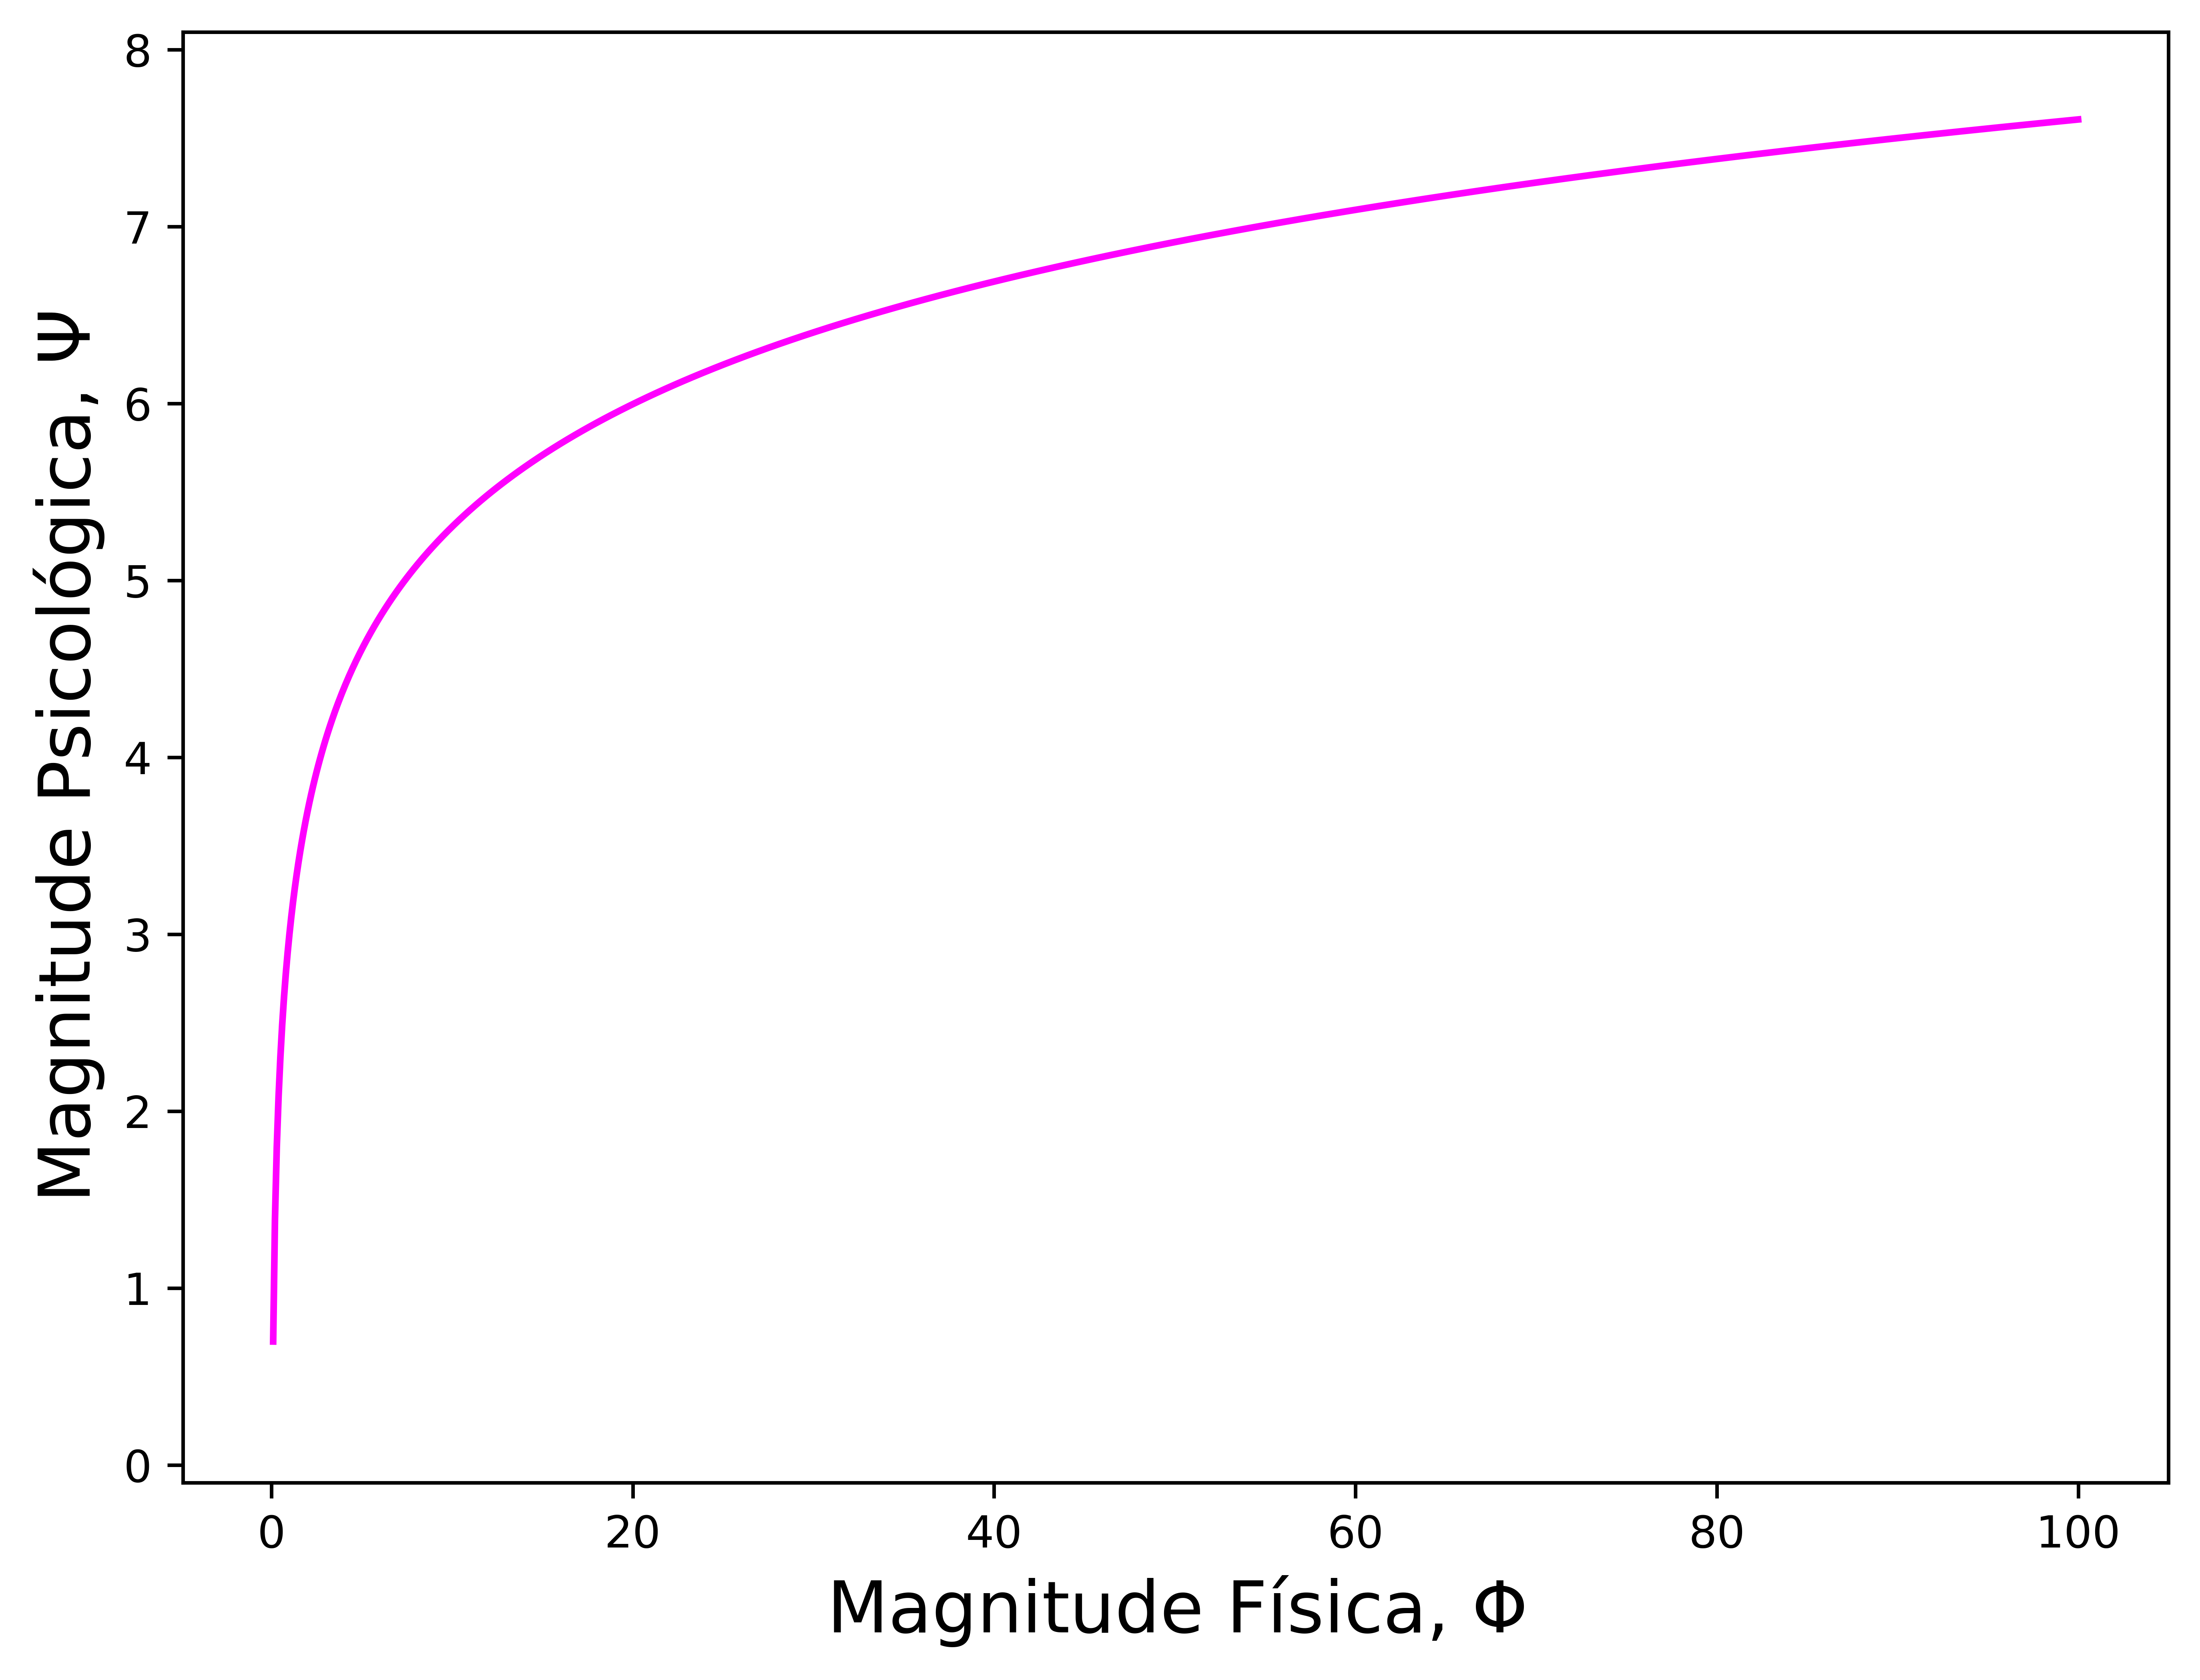

In [197]:
# Lei de Fechner
a, b = 3, 1
phi = np.linspace(0.1, 100, 1_000)
psi = b * np.log(phi) + a


plt.figure(figsize = (8, 6), dpi = 800)
plt.plot(phi, psi, color = "magenta")
plt.ylim(-0.1, 8.1)
plt.xlabel("Magnitude Física, " + r"${\Phi}$", fontsize = 16)
plt.ylabel("Magnitude Psicológica, " + r"${\Psi}$", fontsize = 16)

plt.savefig("015.2 - Lei de Fechner, exemplo.jpg", dpi = 600, bbox_inches = "tight")
plt.show()

A seguir, implemento alguns gráficos mostrando a relação entre intensidade do estímulo e magnitude da sensação psicológica correspondente, que é descrita por meio da lei de Stevens. Essa lei se foca em comparações **diretas** e em nível de medida **intervalar ou de razão**. Ela propõe que razões físicas iguais entre estímulos geram razões psicológicas correspondentes entre sensações. Quando essa razão é idêntica, então a relação é linear. No entanto, na maioria dos casos, a razão sensorial é menor do que a razão física entre estímulos (o que, é claro, é adaptativo; é importante que dobrar ou triplicar a quantidade de luz em um ambiente não gere o dobro ou o triplo da sensação de luminosidade em um observador). Para detalhes, ver Nunnally e Berstein (1994) ou qualquer manual de Percepção.

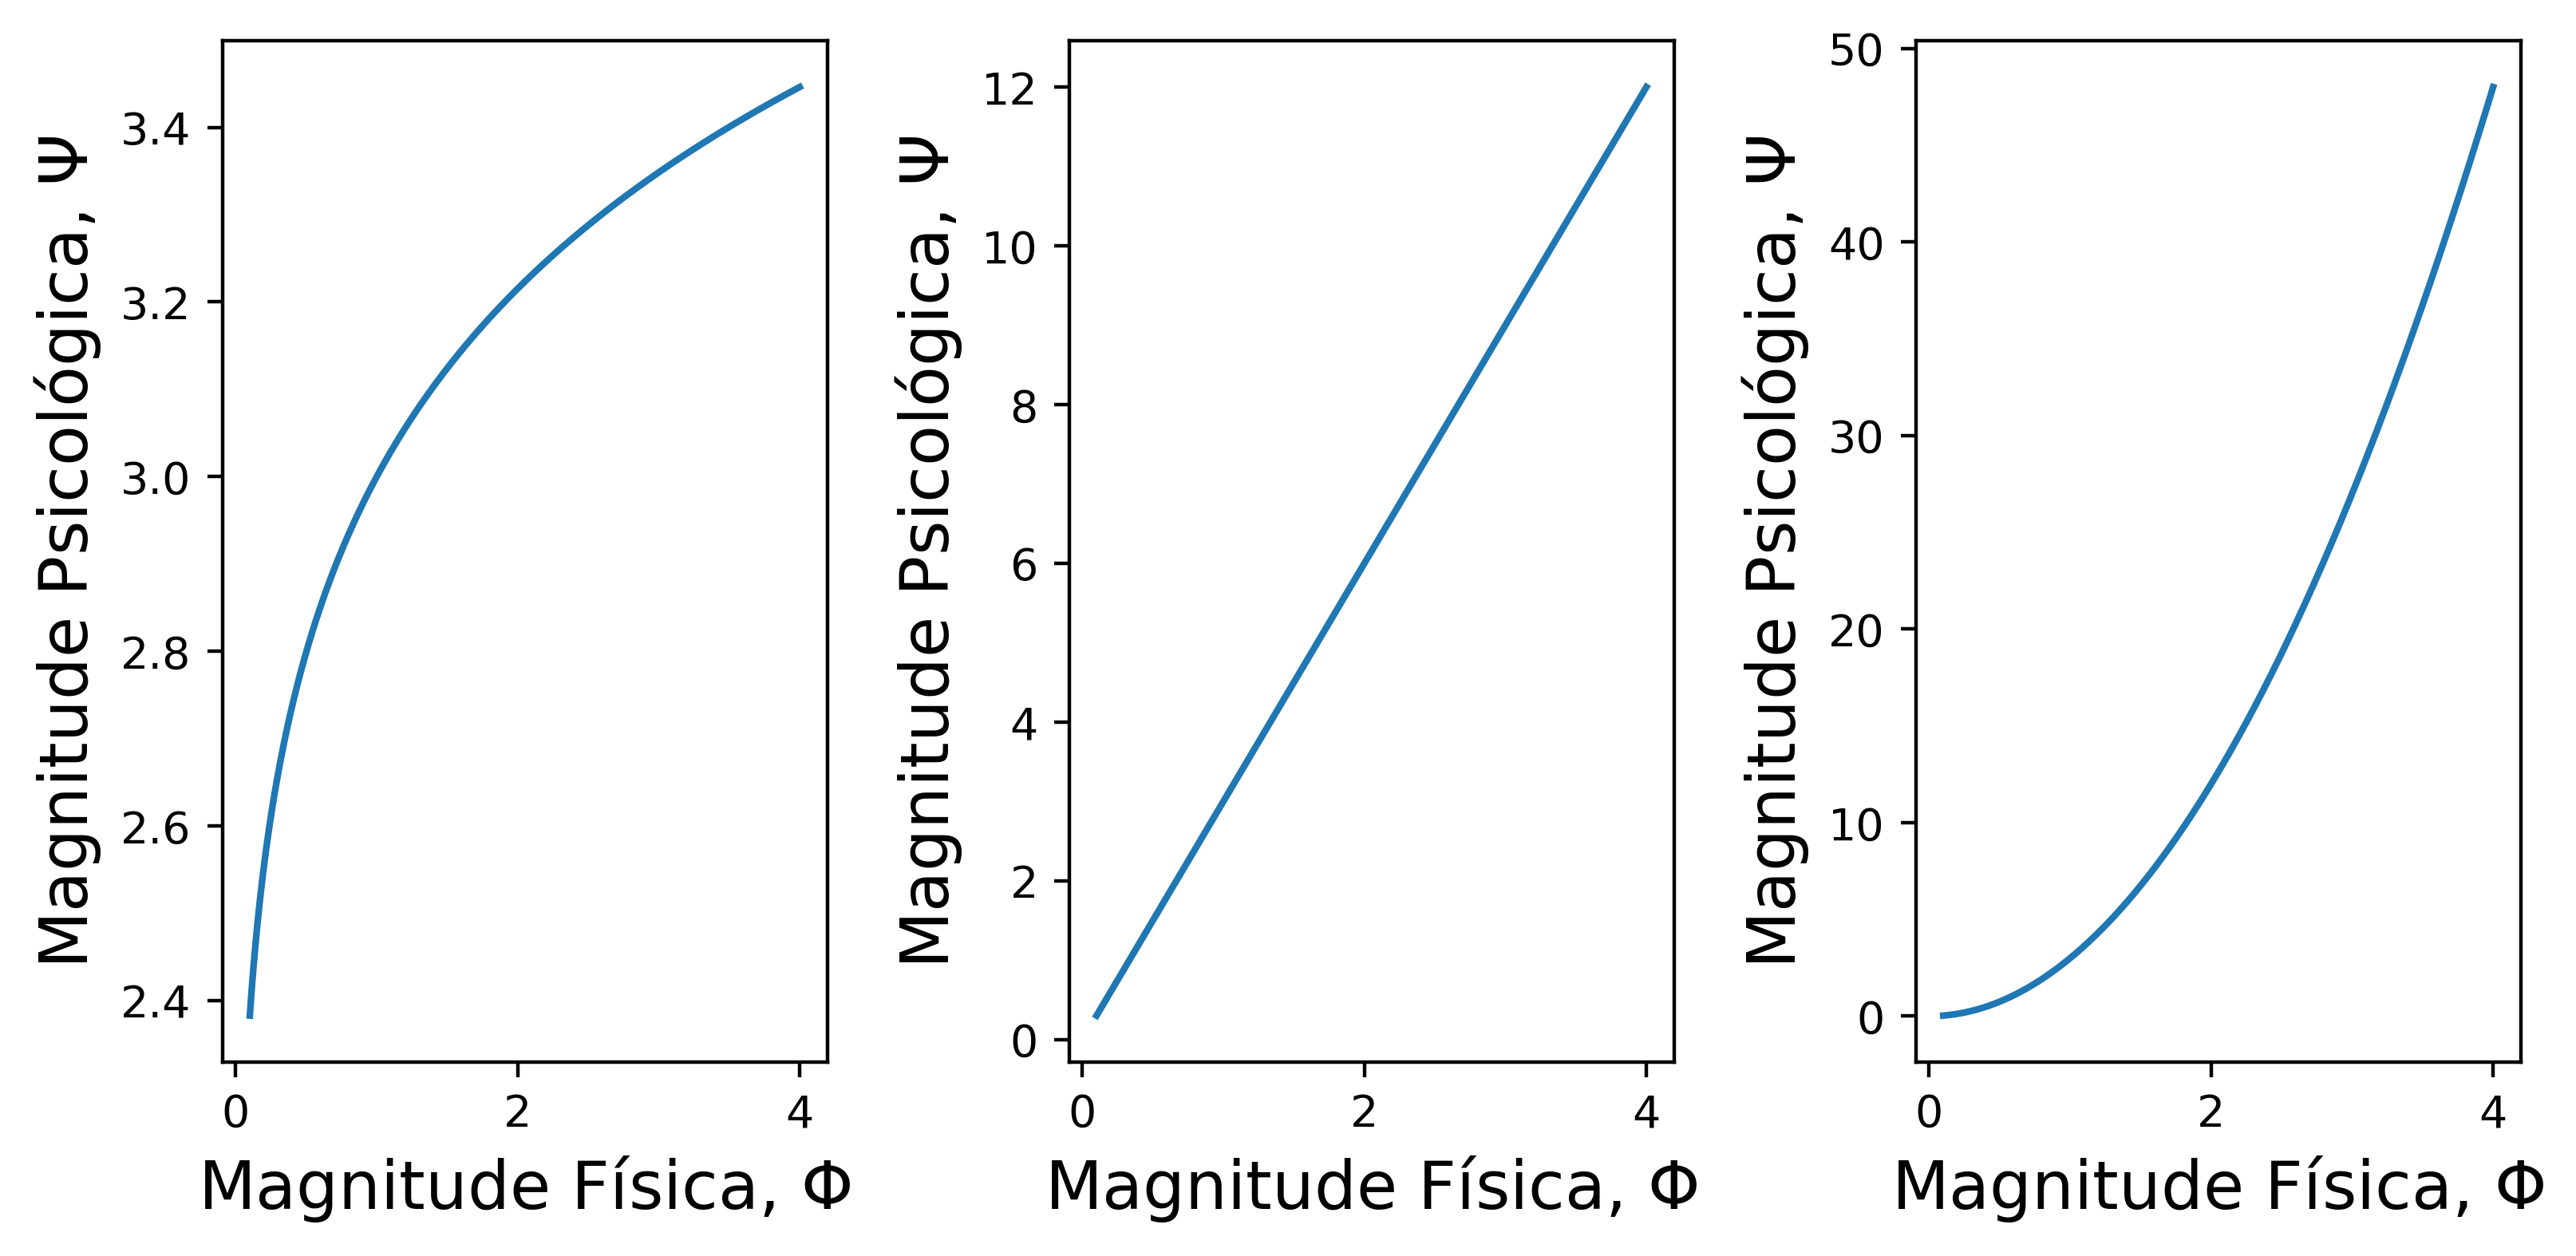

In [186]:
# Lei de potência de Stevens, diferentes cenários
a1, a2, a3, b = 0.1, 1, 2, 3
phi = np.linspace(0.1, 4, 1_000)
psi1 = b * phi ** a1
psi2 = b * phi ** a2
psi3 = b * phi ** a3

psis = [psi1, psi2, psi3]

fig, ax = plt.subplots(1, 3, figsize = (9, 4), dpi = 400)

for i in range(3):
    ax[i].plot(phi, psis[i])
    ax[i].set_xlabel("Magnitude Física, " + r"${\Phi}$", fontsize = 15)
    ax[i].set_ylabel("Magnitude Psicológica, " + r"${\Psi}$", fontsize = 15)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig("015.3 - Lei de Stevens, exemplos.jpg", dpi = 600, bbox_inches = "tight")
plt.show()

Por fim, veremos algumas simulações da lei do julgamento comparativo de Thurstone. Para detalhes, ver Nunnally e Berstein (1994).

In [187]:
# lendo os dados que contém a preferência relativa (par a par) de diferentes vegetais
thurstone = pd.read_csv("Thurstone.csv", encoding = "ISO-8859-1")
thurstone.head(10)

,Vegetal,1. Nabo,2. Repolho,3. Beterraba,4. Aspargo,5. Cenoura,6. Espinafre,7. Feijão de corda,8. Ervilha,9. Milho
0,1. Nabo,0.500,0.818,0.770,0.811,0.878,0.892,0.899,0.892,0.926
1,2. Repolho,0.182,0.500,0.601,0.723,0.743,0.736,0.811,0.845,0.858
2,3. Beterraba,0.230,0.399,0.500,0.561,0.736,0.676,0.845,0.797,0.818
3,4. Aspargo,0.189,0.277,0.439,0.500,0.561,0.588,0.676,0.601,0.730
4,5. Cenoura,0.122,0.257,0.264,0.439,0.500,0.493,0.574,0.709,0.764
5,6. Espinafre,0.108,0.264,0.324,0.412,0.507,0.500,0.628,0.682,0.628
6,7. Feijão de corda,0.101,0.189,0.155,0.324,0.426,0.372,0.500,0.527,0.642
7,8. Ervilha,0.108,0.155,0.203,0.399,0.291,0.318,0.473,0.500,0.628
8,9. Milho,0.074,0.142,0.182,0.270,0.236,0.372,0.358,0.372,0.500


In [188]:
# transforma os julgamentos em escores z
thurstone_z = stats.norm.ppf(thurstone.iloc[:, 1:])
thurstone_z                           

array([[ 0.        ,  0.90776953,  0.73884685,  0.88158735,  1.16504692,
         1.2372346 ,  1.27587418,  1.2372346 ,  1.44663207],
       [-0.90776953,  0.        ,  0.25593633,  0.59177689,  0.652622  ,
         0.63106198,  0.88158735,  1.01522203,  1.07137689],
       [-0.73884685, -0.25593633,  0.        ,  0.15350506,  0.63106198,
         0.45654238,  1.01522203,  0.83095332,  0.90776953],
       [-0.88158735, -0.59177689, -0.15350506,  0.        ,  0.15350506,
         0.22240323,  0.45654238,  0.25593633,  0.61281299],
       [-1.16504692, -0.652622  , -0.63106198, -0.15350506,  0.        ,
        -0.0175473 ,  0.18656718,  0.5504657 ,  0.71922873],
       [-1.2372346 , -0.63106198, -0.45654238, -0.22240323,  0.0175473 ,
         0.        ,  0.32656093,  0.47329883,  0.32656093],
       [-1.27587418, -0.88158735, -1.01522203, -0.45654238, -0.18656718,
        -0.32656093,  0.        ,  0.06773071,  0.36380986],
       [-1.2372346 , -1.01522203, -0.83095332, -0.25593633, -0

In [189]:
# calcula escores finais de lei de julgamento comparativo
sum_ = thurstone_z.sum(axis = 0)
sum_
average = thurstone_z.sum(axis = 0) / 9
average
final_scale = average - min(average)
final_scale.round(3)

array([0.   , 0.522, 0.654, 0.98 , 1.117, 1.144, 1.4  , 1.444, 1.629])

In [190]:
mean_discriminal_responses = final_scale * 2 ** 0.5
mean_discriminal_responses

array([0.        , 0.73828424, 0.92551713, 1.38528431, 1.57979405,
       1.61746753, 1.98006234, 2.04188973, 2.30437898])

In [191]:
# agora, com base nas respostas discriminais médias (acima), 
# usamos esses valores para o processo gerador de dados, supondo que uma nova amostra 
# está estimando os mesmos estímulos
# a matriz obtida deverá ser próxima à matriz inicial usada nas análises

trials = 1_000
mu, sigma = 0, 1
matrix = list()

for value2 in mean_discriminal_responses:
    row = list()
    for value1 in mean_discriminal_responses:
        j = np.repeat(value1, trials) + np.random.normal(mu, sigma, trials)
        k = np.repeat(value2, trials) + np.random.normal(mu, sigma, trials)
        row.append(np.mean(j > k))
    
    matrix.append(row)
    
np.array(matrix).round(3)


array([[0.485, 0.707, 0.74 , 0.813, 0.874, 0.87 , 0.919, 0.931, 0.94 ],
       [0.295, 0.469, 0.546, 0.683, 0.735, 0.707, 0.815, 0.787, 0.866],
       [0.256, 0.433, 0.513, 0.614, 0.684, 0.674, 0.763, 0.796, 0.832],
       [0.177, 0.324, 0.352, 0.489, 0.553, 0.565, 0.675, 0.692, 0.752],
       [0.15 , 0.273, 0.338, 0.448, 0.459, 0.495, 0.605, 0.623, 0.697],
       [0.133, 0.298, 0.306, 0.43 , 0.487, 0.498, 0.589, 0.599, 0.673],
       [0.084, 0.188, 0.225, 0.331, 0.376, 0.395, 0.508, 0.539, 0.59 ],
       [0.071, 0.187, 0.203, 0.306, 0.375, 0.383, 0.473, 0.499, 0.574],
       [0.05 , 0.137, 0.178, 0.226, 0.292, 0.31 , 0.427, 0.43 , 0.507]])

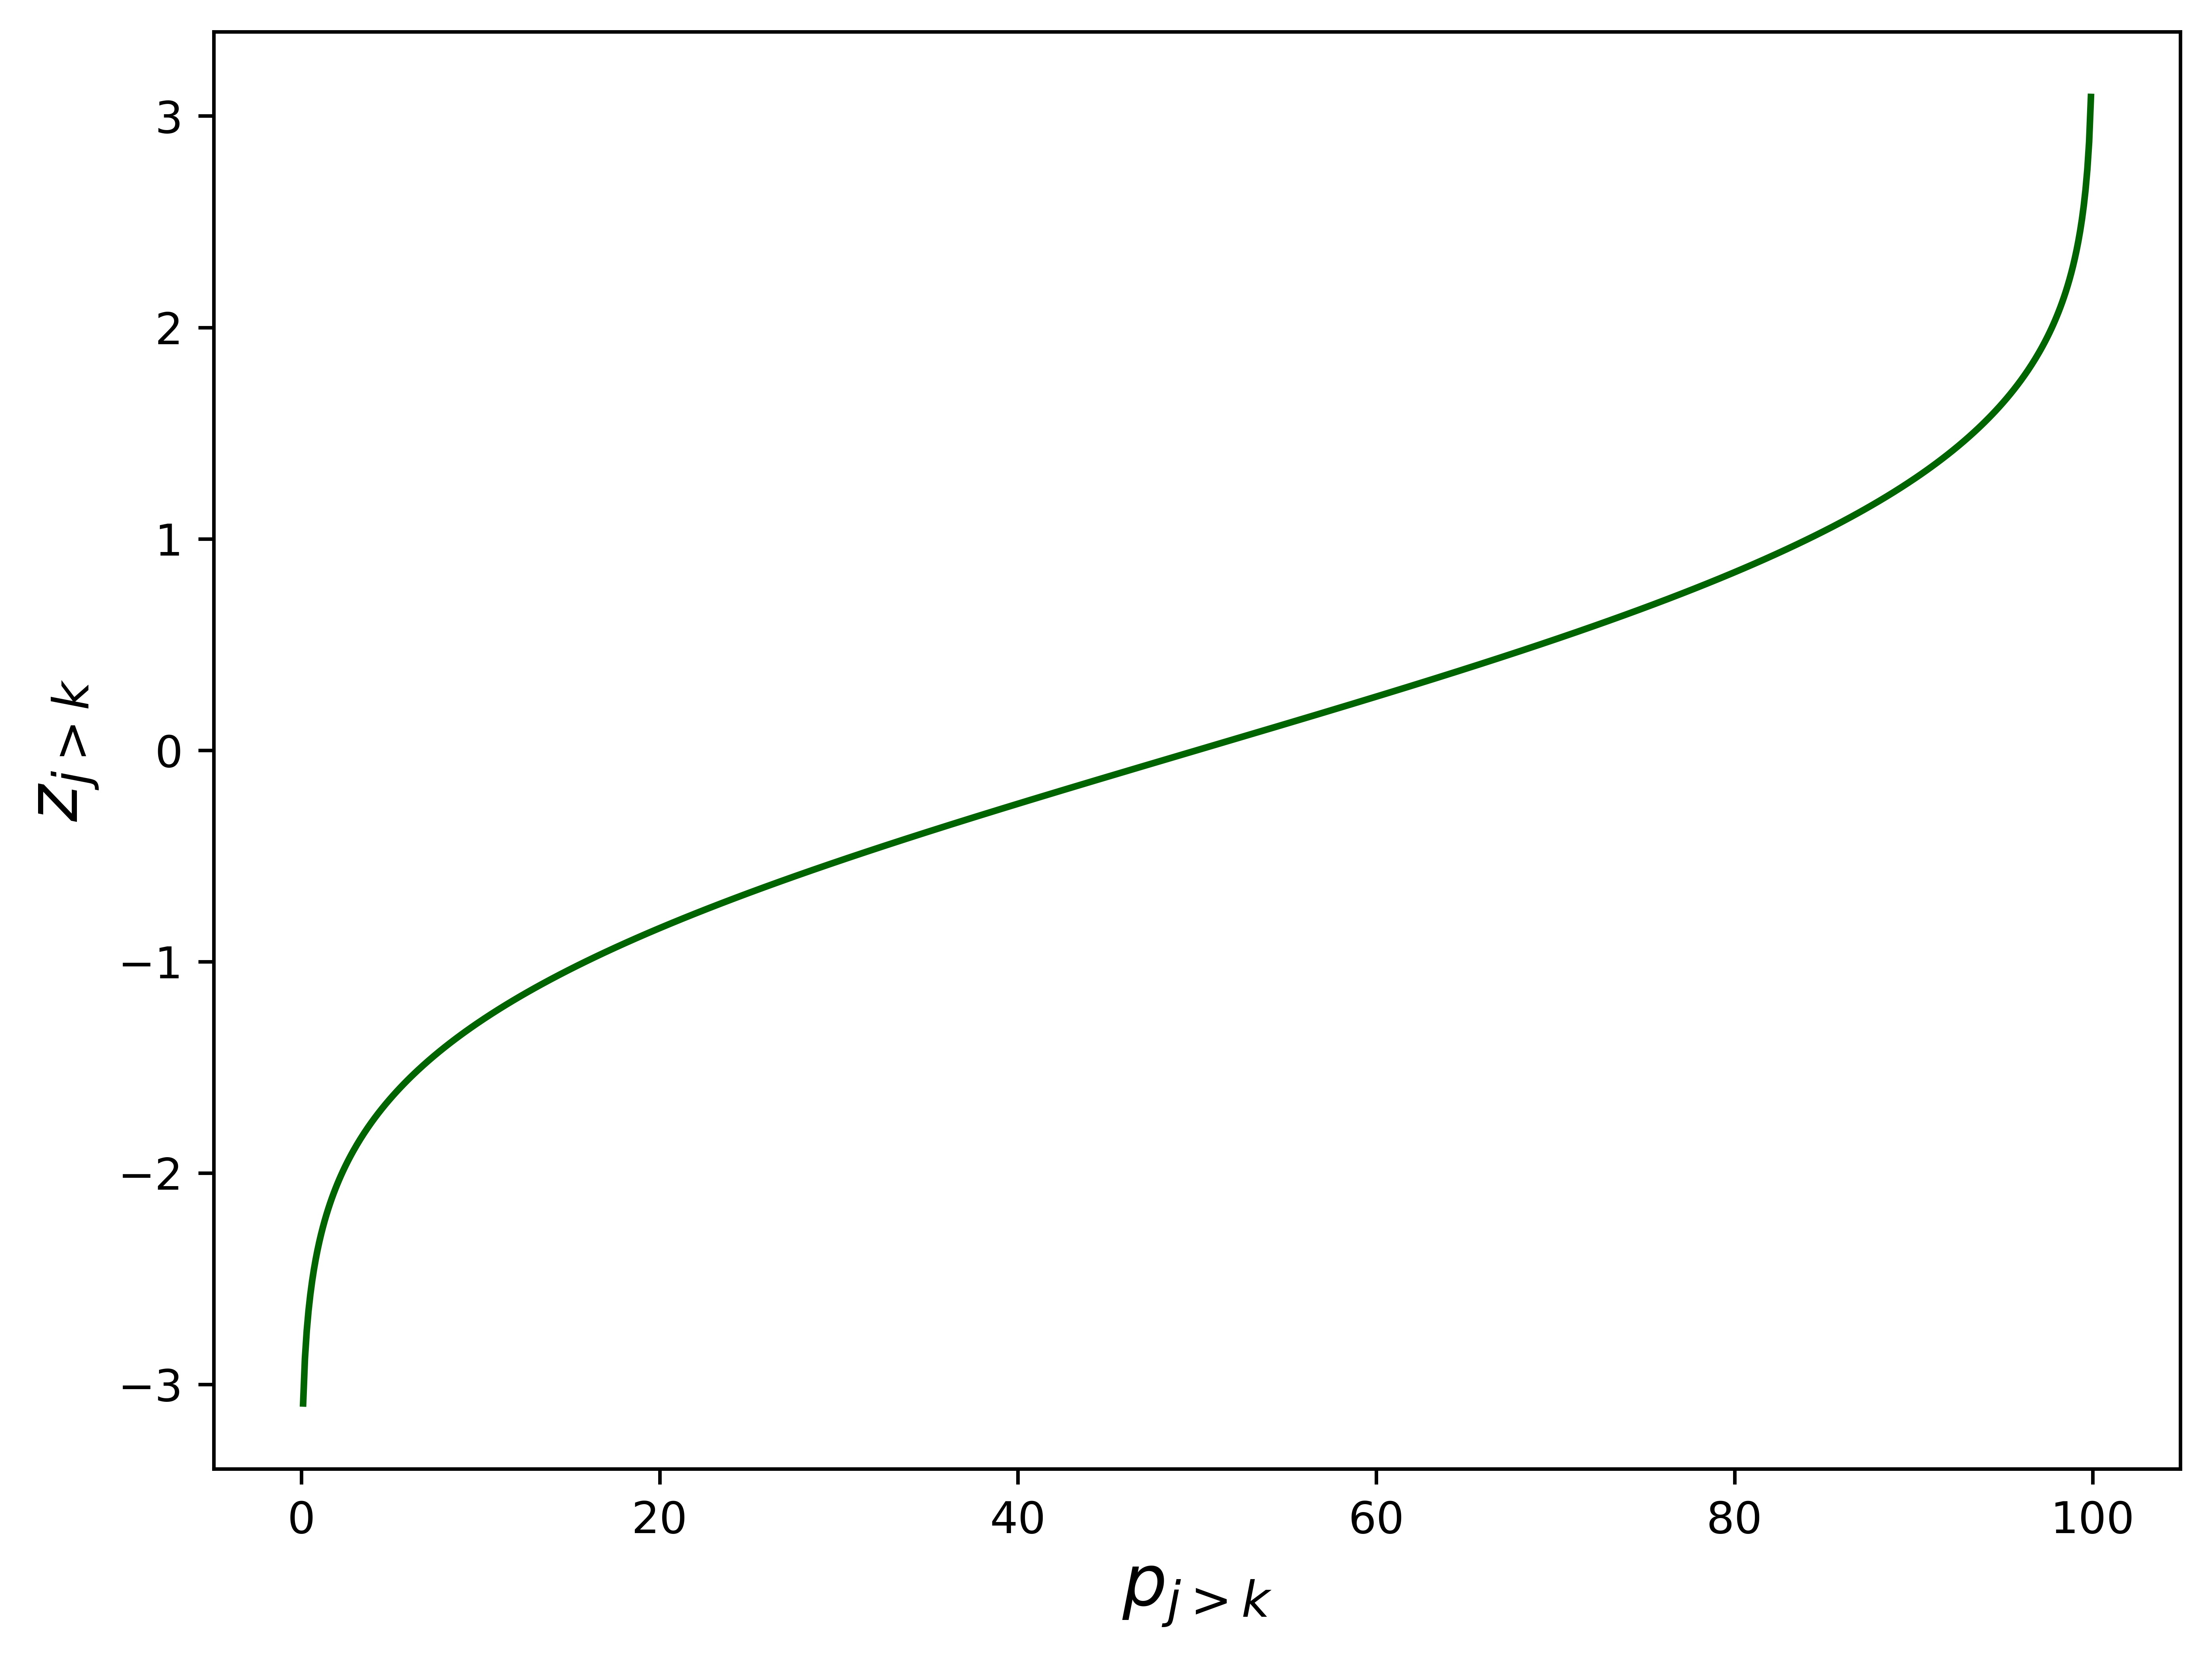

In [198]:
# plotando um gráfico com relacionando a preferência por um dado alimento 
# versus o escore z correspondente em uma distribuição normal padrão
pjk = np.linspace(0, 1, 1_000)
zjk = stats.norm.ppf(pjk)

plt.figure(figsize = (8, 6), dpi = 800)
plt.plot(pjk * 100, zjk, "darkgreen")
plt.xlabel(r"$p_{{{j > k}}}$", fontsize = 16)
plt.ylabel(r"$z_{{{j > k}}}$", fontsize = 16)

plt.savefig("015.4 - Lei do julgamento comparativo de Thurstone.jpg", dpi = 600, bbox_inches = "tight")
plt.show()